<a href="https://colab.research.google.com/github/Rimshashafiq/Uber-Ride-Analysis/blob/main/UBER_RIDE_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UBER DATA ANALYSIS PROJECT**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Dataset
df = pd.read_csv("UberDataset.csv")
df.shape

(1156, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [5]:
#handling missing values
df.isnull().sum()
df["PURPOSE"].fillna("Not Defined",inplace = True) #filling missing values of "purpose" column with "not defined" because we dont want to delete that data.
df["START_DATE"] = pd.to_datetime(df["START_DATE"],errors="coerce")
df["END_DATE"] = pd.to_datetime(df["END_DATE"],errors="coerce")
df.dropna(inplace=True) #removing all the null values


<ipython-input-5-43c299529f63>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PURPOSE"].fillna("Not Defined",inplace = True) #filling missing values of "purpose" column with "not defined" because we dont want to delete that data.


In [6]:
# Feature engineering: Extract relevant time features
from datetime import datetime
df["DATE"]= pd.DatetimeIndex(df["START_DATE"]).date
df["TIME"]= pd.DatetimeIndex(df["START_DATE"]).hour

# Q1. In which category do people book the most uber rides?


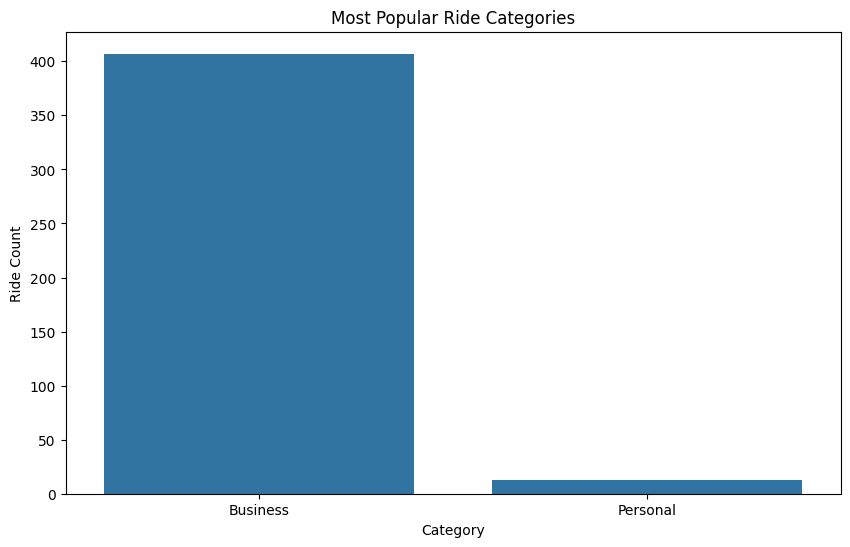

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="CATEGORY", order=df["CATEGORY"].value_counts().index)
plt.title("Most Popular Ride Categories")
plt.xlabel("Category")
plt.ylabel("Ride Count")
plt.show()

# Q2. For which purpose do people book uber rides the most?

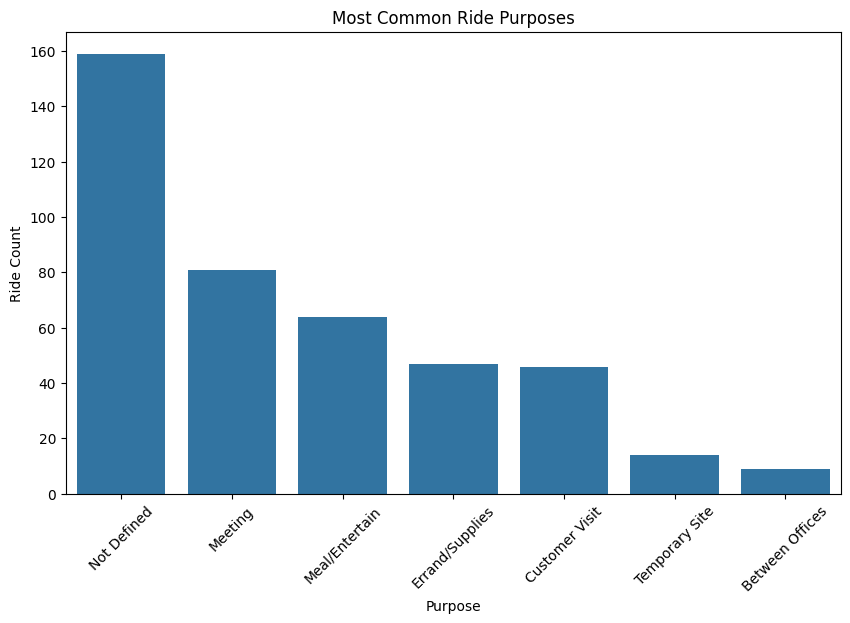

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="PURPOSE", order=df["PURPOSE"].value_counts().index)
plt.title("Most Common Ride Purposes")
plt.xlabel("Purpose")
plt.ylabel("Ride Count")
plt.xticks(rotation=45)
plt.show()

# Q3. At which time do people book cabs the most from uber?

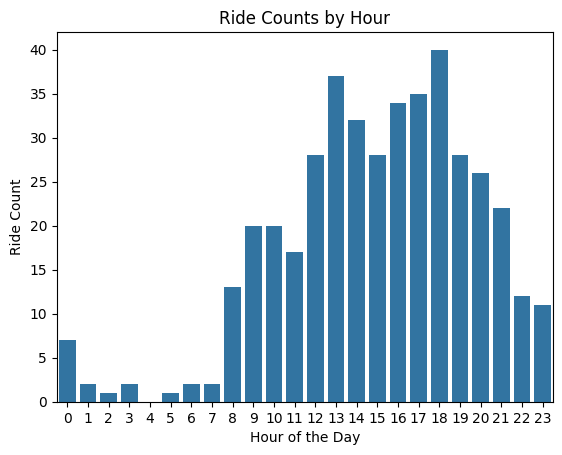

In [9]:
sns.countplot(data=df, x="TIME", order=range(24))
plt.title("Ride Counts by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Ride Count")
plt.show()

#Q4. In which months do people book uber rides less frequently?

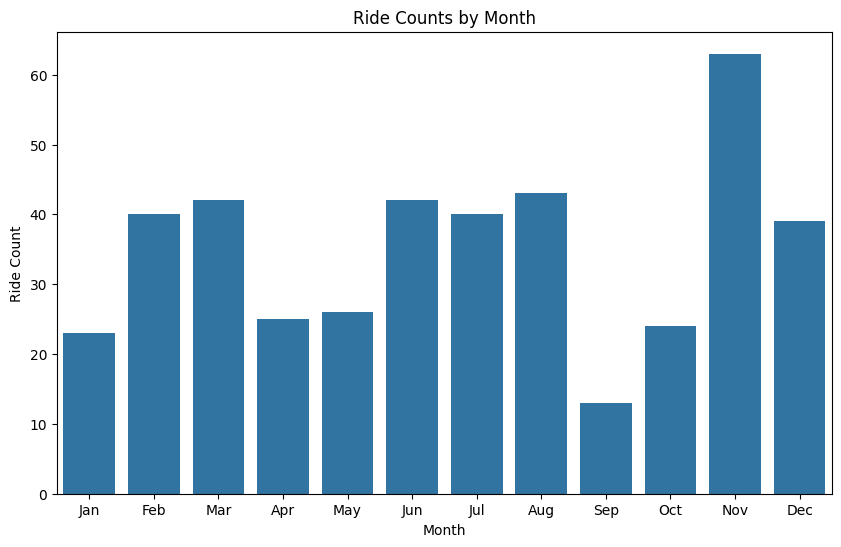

In [10]:
#introducing a new column of month
df['MONTH'] = df['START_DATE'].dt.month
month_counts = df['MONTH'].value_counts().sort_index()
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.figure(figsize=(10, 6))
sns.barplot(x=month_labels, y=month_counts)
plt.title("Ride Counts by Month")
plt.xlabel("Month")
plt.ylabel("Ride Count")
plt.show()

#Q5. On which days of the week do people book Uber rides the most?

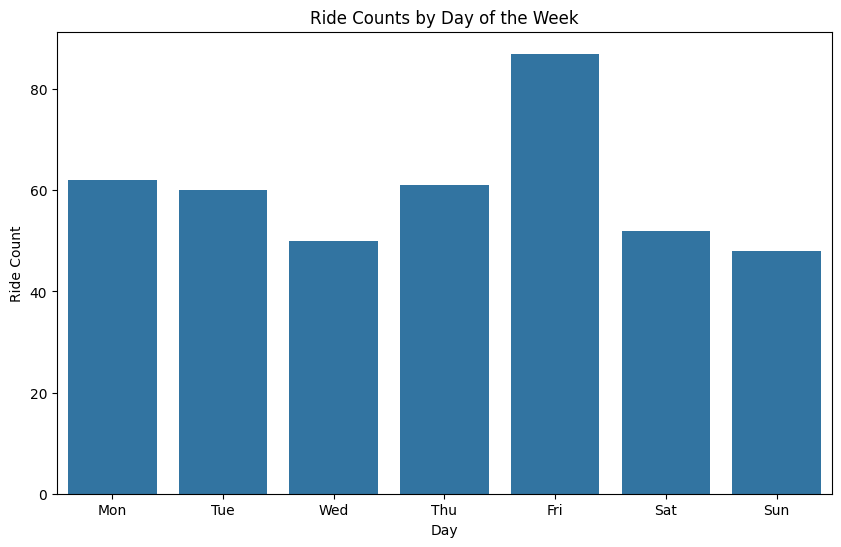

In [11]:
df["DAY"] = df["START_DATE"].dt.weekday
day_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
day_counts = df['DAY'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=day_labels, y=day_counts)
plt.title("Ride Counts by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Ride Count")
plt.show()

#Q6 How many miles do people usually book a cab through Uber?

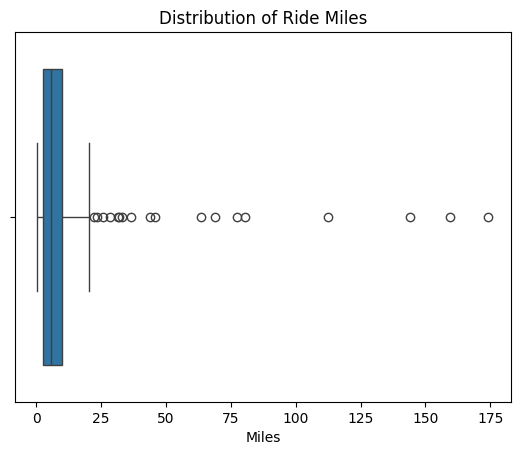

In [12]:
sns.boxplot(data=df, x="MILES")
plt.title("Distribution of Ride Miles")
plt.xlabel("Miles")
plt.show()

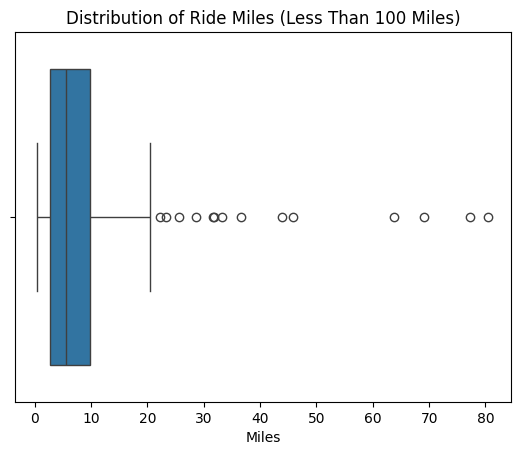

In [13]:
# Filter the DataFrame for rides where 'MILES' is less than 100
filtered_df = df[df['MILES'] < 100]

# Plot the boxplot for filtered data
sns.boxplot(data=filtered_df, x='MILES')
plt.title("Distribution of Ride Miles (Less Than 100 Miles)")
plt.xlabel("Miles")
plt.show()

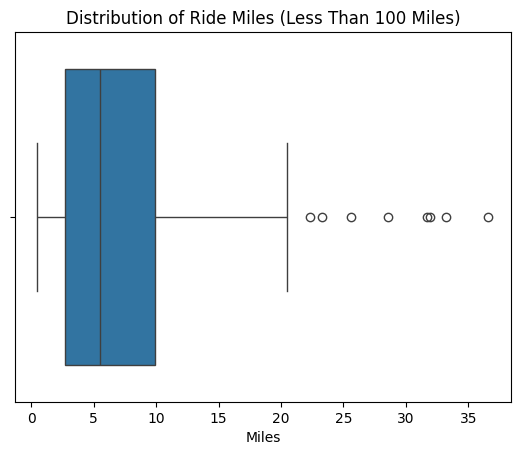

In [14]:
filtered__df= df[df.MILES<40]
# Plot the boxplot for filtered data
sns.boxplot(data=filtered__df, x='MILES')
plt.title("Distribution of Ride Miles (Less Than 100 Miles)")
plt.xlabel("Miles")
plt.show()


<ipython-input-15-4789a69f2e34>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.MILES<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

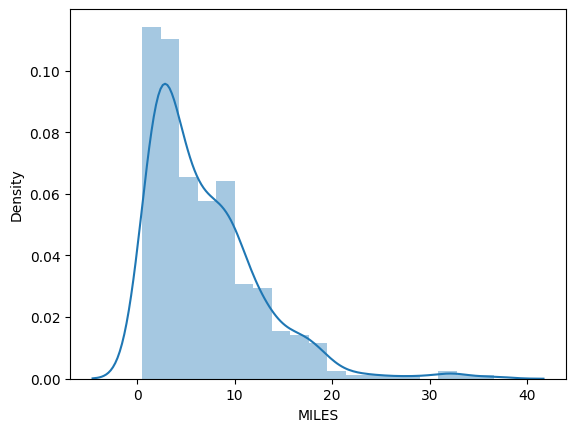

In [15]:
sns.distplot(df[df.MILES<40]['MILES'])

# Predictive Analysis for High-Demand Periods

[[31  0]
 [ 0 53]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        53

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



<ipython-input-16-89338829f589>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importances_df, palette="viridis")  # Use a vibrant palette


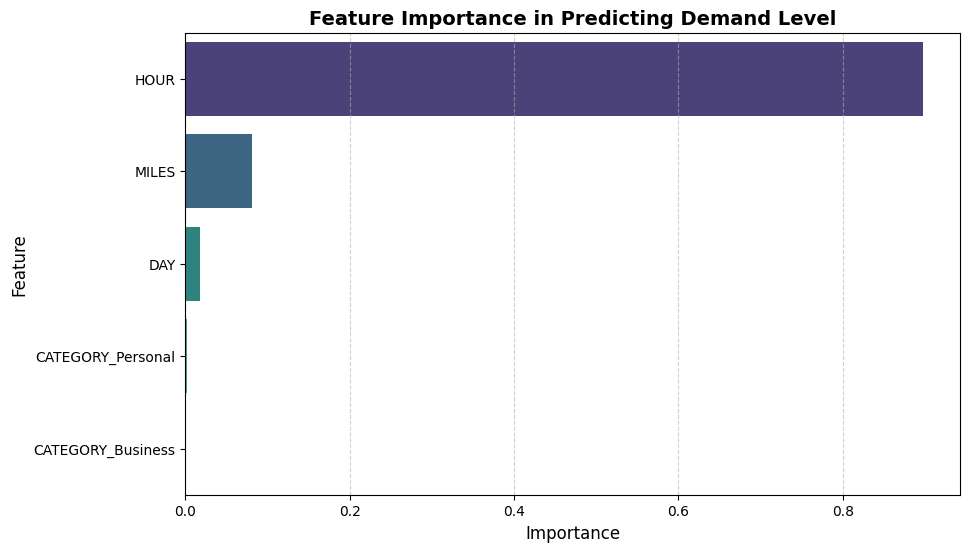

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
# Aggregate data by hour to calculate ride counts
time_demand = df.groupby("TIME").size().reset_index(name="RIDE_COUNT")

# Define high-demand threshold (e.g., 75th percentile of ride counts)
threshold = np.percentile(time_demand["RIDE_COUNT"], 75)
time_demand["DEMAND_LEVEL"] = np.where(time_demand["RIDE_COUNT"] >= threshold, 1, 0)

# Merge demand level back into the original dataset
df = df.merge(time_demand[["TIME", "DEMAND_LEVEL"]], on="TIME", how="left")


# Sample feature selection (make sure 'CATEGORY' is a categorical column)
features = ["DAY", "TIME", "MILES", "CATEGORY"]
X = df[features]  # Feature data
y = df["DEMAND_LEVEL"]  # Target variable

# Create a simple column transformer that applies one-hot encoding to the 'CATEGORY' column
preprocessor = ColumnTransformer(
    transformers=[
        ('category', OneHotEncoder(), ['CATEGORY']),  # One-Hot Encoding for 'CATEGORY'
        ('numerical', 'passthrough', ['DAY', 'TIME', 'MILES'])  # Keep the numerical features as it is
    ])

# Create a machine learning pipeline with preprocessor and Random Forest
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessor first
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest classifier
])

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print out the evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))  # Confusion matrix
print(classification_report(y_test, y_pred))  # Detailed metrics like precision, recall

# Extract feature importance
# After the transformation, we need to access the feature importance from the trained model
importances = model.named_steps['classifier'].feature_importances_

# Access the names of the features after one-hot encoding
encoded_features = model.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['CATEGORY']).tolist() + ['DAY', 'HOUR', 'MILES']

# Create a DataFrame to hold feature names and their importance scores
importances_df = pd.DataFrame({
    "Feature": encoded_features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance with a colorful palette
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importances_df, palette="viridis")  # Use a vibrant palette
plt.title("Feature Importance in Predicting Demand Level", fontsize=14, fontweight='bold')
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add subtle gridlines for better readability
plt.show()

